In [537]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures,
    OneHotEncoder,
    StandardScaler,
    PowerTransformer,
    MinMaxScaler,
    LabelEncoder,
    RobustScaler,
)
from sklearn.model_selection import (
    RepeatedStratifiedKFold,
    KFold,
    cross_val_predict,
    train_test_split,
    GridSearchCV,
    cross_val_score,
    cross_validate,
)
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import (
    plot_confusion_matrix,
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix,
    accuracy_score,
    classification_report,
)
from sklearn.metrics import (
    make_scorer,
    precision_score,
    precision_recall_curve,
    plot_precision_recall_curve,
    plot_roc_curve,
    roc_auc_score,
    roc_curve,
    f1_score,
    accuracy_score,
    recall_score,
)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    AdaBoostClassifier,
)
from sklearn.feature_selection import (
    SelectKBest,
    SelectPercentile,
    f_classif,
    f_regression,
    mutual_info_regression,
)
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("max_colwidth", 200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 50)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

import colorama
from colorama import Fore, Style  # maakes strings colored

# !pip3 install termcolor
from termcolor import colored

In [538]:
df = pd.read_csv("boat_data.csv", encoding="UTF-8")

In [539]:
df["Number of views last 7 days"].describe(percentiles=[0.25, 0.5, 0.75, 0.9])

count   9888.000
mean     149.161
std      151.820
min       13.000
25%       70.000
50%      108.000
75%      172.000
90%      283.000
max     3263.000
Name: Number of views last 7 days, dtype: float64

In [540]:
most_views = df["Number of views last 7 days"].quantile(0.9)
most_views

283.0

In [541]:
df.sample(5)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
6734,EUR 87000,Motor Yacht,BÃ©nÃ©teau power boats,"Used boat,Diesel",2009,10.000,3.330,NaN,Italy Â» Aprilia Marittima di Latisana (UD),129
3863,EUR 695000,Motor Yacht,Riva power boats,Used boat,2012,13.400,3.880,GRP,Netherlands,350
3546,EUR 1439000,Motor Yacht,Galeon power boats,Used boat,2019,20.800,5.000,NaN,Croatia (Hrvatska) Â» Croatia,156
1775,EUR 100800,Cabin Boat,Finnmaster power boats,"new boat on order,Unleaded",2020,8.000,2.700,NaN,Germany Â» Ubstadt-Weiherr,88
1118,EUR 55000,Motor Yacht,Sunseeker power boats,"Used boat,Diesel",1992,11.200,3.160,GRP,Portugal Â» North Of,120


In [542]:
df.shape

(9888, 10)

In [543]:
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [544]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000,9879.000,9832.000,9888.000
mean,1893.193,11.570,3.520,149.161
std,460.202,6.003,1.221,151.820
min,0.000,1.040,0.010,13.000
25%,1996.000,7.470,2.540,70.000
50%,2007.000,10.280,3.330,108.000
75%,2017.000,13.930,4.250,172.000
max,2021.000,100.000,25.160,3263.000


In [545]:
df[["Manufacturer", "Material", "Location", "Type"]] = df[
    ["Manufacturer", "Material", "Location", "Type"]
].fillna("Other")
#df[["Width", "Length"]] = df[["Width", "Length"]].fillna(0)
df.dropna(inplace=True)

In [546]:
df["Currency"] = df["Price"].str[:3]

In [547]:
df["Currency"].value_counts()

EUR    8381
CHF     978
Â£      298
DKK     175
Name: Currency, dtype: int64

In [548]:
df["Price"] = df["Price"].str[3:]
df["Price"] = df["Price"].astype(np.int32)

In [549]:
currency_exchange = {"EUR": 1, "CHF": 0.96, "Â£ ": 1.17, "DKK": 0.13}

In [550]:
df["EUR Price"] = df.apply(
    lambda x: round(x["Price"] * currency_exchange.get(x["Currency"]),2), axis=1
)

In [551]:
df.dtypes

Price                            int32
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
Currency                        object
EUR Price                      float64
dtype: object

In [552]:
df.head(30)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,EUR Price
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.000,1.900,Other,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3203.520
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.000,1.500,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490.000
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.690,1.420,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3619.200
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.000,1.000,Other,Denmark Â» Svendborg,64,DKK,3367.000
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.550,1.460,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399.000
5,3650,Sport Boat,Linder power boats,new boat from stock,0,4.030,1.560,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132,CHF,3504.000
6,3600,Catamaran,Other,"Used boat,Unleaded",1999,6.200,2.380,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,CHF,3456.000
8,3333,Fishing Boat,Crescent power boats,new boat from stock,2019,3.640,1.370,Other,Germany Â» Bayern Â» Boote+service Oberbayern,45,EUR,3333.000
9,3300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.350,1.730,Other,Italy Â» Dormelletto,180,EUR,3300.000
10,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.350,1.750,GRP,Switzerland Â» Seengen,239,CHF,3360.000


In [553]:
df["Country"] = df["Location"].str.split(" ", 1, expand=True)[0]

In [554]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,EUR Price,Country
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.000,1.900,Other,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3203.520,Switzerland
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.000,1.500,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490.000,Germany
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.690,1.420,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3619.200,Switzerland
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.000,1.000,Other,Denmark Â» Svendborg,64,DKK,3367.000,Denmark
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.550,1.460,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399.000,Germany


In [555]:
df.describe()

,Price,Year Built,Length,Width,Number of views last 7 days,EUR Price
count,9832.000,9832.000,9832.000,9832.000,9832.000,9832.000
mean,320068.448,1892.767,11.571,3.520,149.095,302481.026
std,1007978.164,461.040,6.004,1.221,152.012,971656.819
min,3300.000,0.000,1.040,0.010,13.000,3203.520
25%,44000.000,1996.000,7.470,2.540,70.000,42977.500
50%,95000.000,2007.000,10.280,3.330,107.000,92000.000
75%,255000.000,2017.000,13.922,4.250,171.000,248000.000
max,31000000.000,2021.000,100.000,25.160,3263.000,31000000.000


In [556]:
df["Type"].value_counts()

Used boat,Diesel                4120
Used boat,Unleaded              1675
Used boat                       1446
new boat from stock,Unleaded    1105
new boat from stock              661
new boat from stock,Diesel       290
new boat on order,Unleaded       150
Display Model,Unleaded            75
new boat on order                 61
new boat on order,Diesel          61
Diesel                            57
Used boat,Electric                26
Unleaded                          21
Display Model,Diesel              19
new boat from stock,Electric      18
Display Model                     18
Used boat,Gas                     10
Other                              6
Display Model,Electric             6
new boat from stock,Gas            2
new boat from stock,Hybrid         1
Used boat,Hybrid                   1
Display Model,Gas                  1
Electric                           1
Used boat,Propane                  1
Name: Type, dtype: int64

In [557]:
type_set = set()

In [558]:
for cell in df["Type"]:
    for split in cell.split(","):
        type_set.add(split)

In [559]:
type_set

{'Diesel',
 'Display Model',
 'Electric',
 'Gas',
 'Hybrid',
 'Other',
 'Propane',
 'Unleaded',
 'Used boat',
 'new boat from stock',
 'new boat on order'}

In [560]:
condition_set = {'Display Model','Used boat','new boat from stock','new boat on order'}
fuel_type_set = {'Diesel','Electric','Gas','Hybrid','Propane','Unleaded'}

In [561]:
new_arr = []
for cell in df["Type"]:
    condition_type = fuel_type = "Other"
    for split in cell.split(","):
        if split in condition_set:
            condition_type = split
        elif split in fuel_type_set:
            fuel_type = split
        new_arr.append([condition_type, fuel_type])

In [562]:
df[["Condition","Fuel Type"]] = pd.DataFrame(new_arr)

In [563]:
df

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,EUR Price,Country,Condition,Fuel Type
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.000,1.900,Other,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3203.520,Switzerland,new boat from stock,Other
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.000,1.500,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490.000,Germany,new boat from stock,Other
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.690,1.420,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3619.200,Switzerland,new boat from stock,Other
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.000,1.000,Other,Denmark Â» Svendborg,64,DKK,3367.000,Denmark,new boat from stock,Other
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.550,1.460,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399.000,Germany,new boat from stock,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,4900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.300,2.440,Other,Switzerland Â» Lago Maggiore Â» Riazzino,1116,CHF,4704.000,Switzerland,Used boat,Diesel
9884,4516,Sport Boat,Other,new boat from stock,0,4.170,1.680,GRP,Germany Â» Hamburg Â» HAMBURG,94,EUR,4516.000,Germany,Used boat,Other
9885,4499,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.400,1.800,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354,EUR,4499.000,Germany,Used boat,Diesel
9886,4300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.370,1.890,Other,Italy Â» Dormelletto,266,EUR,4300.000,Italy,Used boat,Other


In [564]:
new_df = df[df["Number of views last 7 days"] > most_views]
new_df.shape

(979, 15)

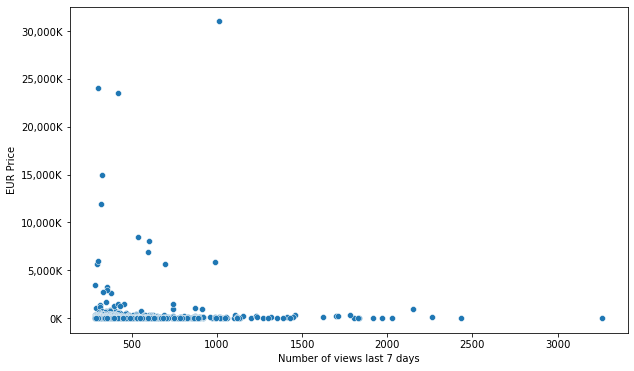

In [565]:
g=sns.scatterplot(data=new_df,x='Number of views last 7 days',y='EUR Price')
xlabels = ['{:,}'.format(int(x)) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(xlabels)

plt.show()

In [566]:
new_df["EUR Price"].describe()

count        979.000
mean      264393.115
std      1688709.291
min         3456.000
25%        19949.500
50%        41000.000
75%        95280.000
max     31000000.000
Name: EUR Price, dtype: float64

437443.35999999987


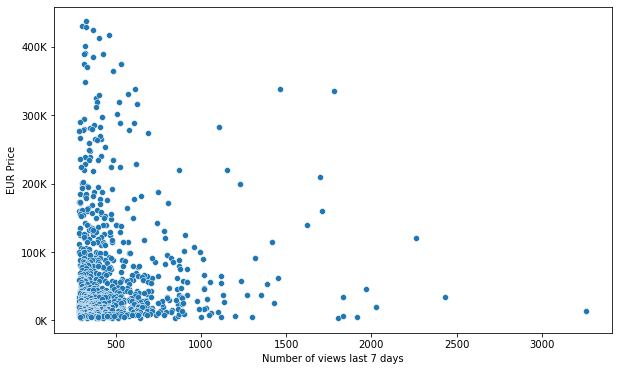

In [567]:
num = new_df["EUR Price"].quantile(0.95)
print(num)
new_df_normal_price = new_df = new_df[new_df["EUR Price"] < num]
g = sns.scatterplot(
    data=new_df_normal_price, x="Number of views last 7 days", y="EUR Price"
)
xlabels = ["{:,}".format(int(x)) + "K" for x in g.get_yticks() / 1000]
g.set_yticklabels(xlabels)

plt.show()

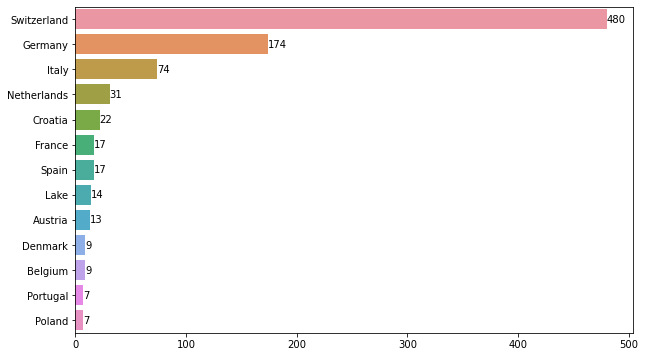

In [568]:
vc = new_df['Country'].value_counts()[new_df['Country'].value_counts()> 5]
bp = sns.barplot(y=vc.index,x=vc.values,orient = 'h')
bp.bar_label(bp.containers[0])
plt.show()

In [569]:
all_vc = df['Country'].value_counts()
top10_vc = new_df['Country'].value_counts()[new_df['Country'].value_counts()> 10]
labels = top10_vc.index
all_vc = pd.Series(all_vc, index = labels)

df1 = pd.DataFrame(all_vc)
df2 = pd.DataFrame(top10_vc)
df1["Type"] = "All"
df2["Type"] = "Number of Boat with Top 10% Views"
df3 = pd.concat([df1,df2])


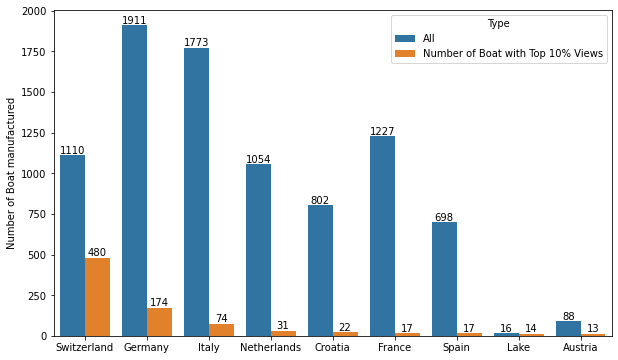

In [572]:
bp = sns.barplot(x=df3.index, y="Country", hue="Type", data=df3);
bp.set(ylabel='Number of Boat manufactured')
bp.bar_label(bp.containers[0])
bp.bar_label(bp.containers[1]) # 有幾條就要設幾次
plt.show()